In [65]:
import pandas as pd
import PortfolioAnalyser as pa
import cufflinks as cf
import PortfolioAnalyser as pa

In [66]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
DFII10 = web.DataReader('DFII10', 'fred', start)
gold = web.DataReader('GOLDPMGBD228NLBM', 'fred', start)

In [67]:
gold.columns = ['GOLD']

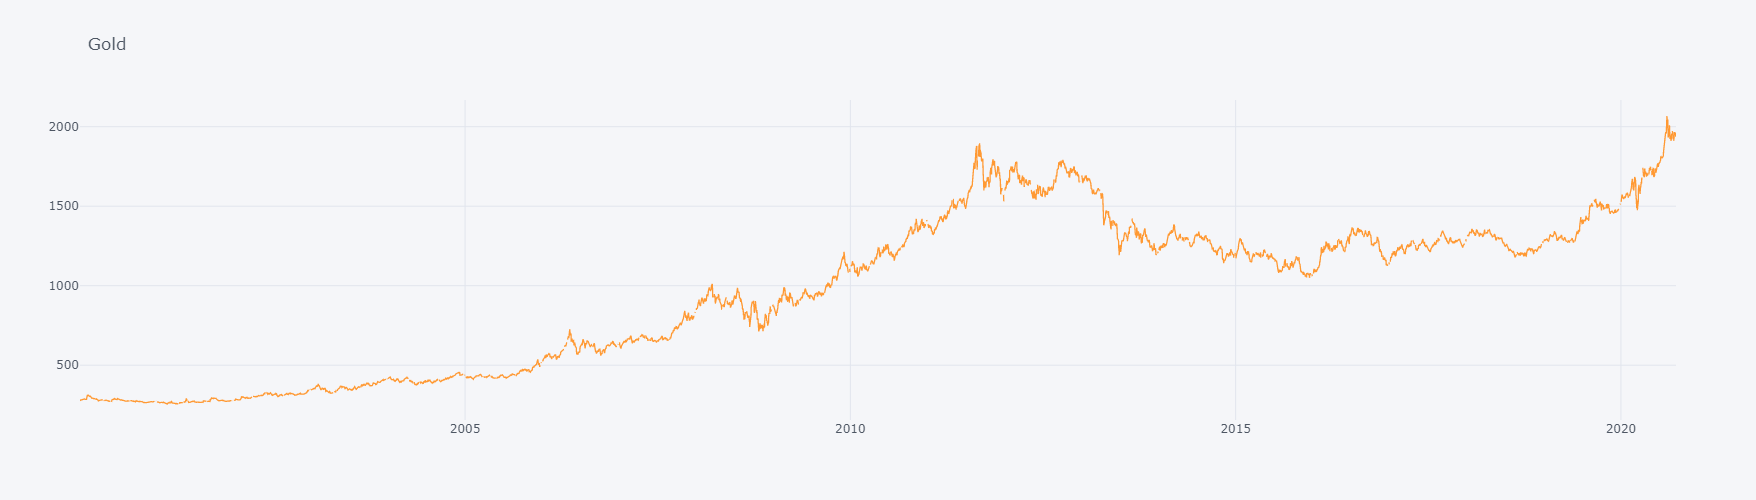

In [68]:
gold.iplot(dimensions=pa.dimensions, title='Gold')

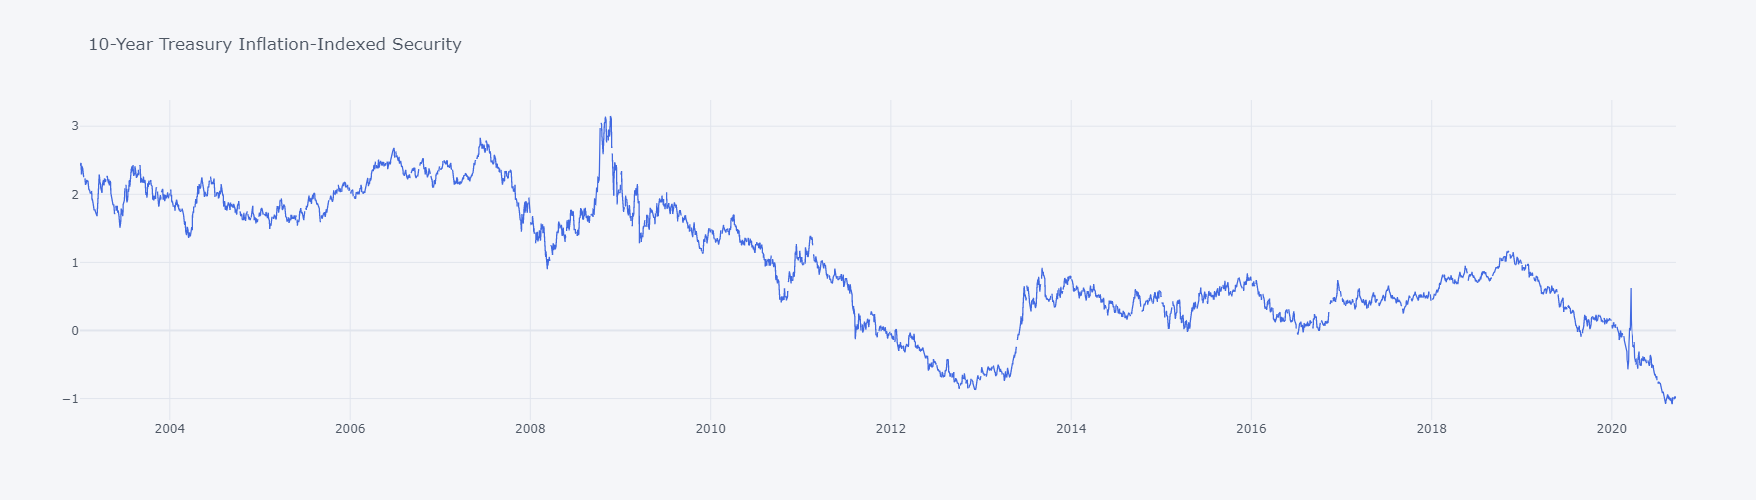

In [69]:
DFII10.iplot(dimensions=pa.dimensions, title='10-Year Treasury Inflation-Indexed Security', color='royalblue')

In [70]:
data = pa.merge_time_series(DFII10, gold, how='inner').ffill()
pa.print_title('Data')
data

**Data**

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2020-09-11,-0.98,"1,947.40"
2020-09-14,-0.97,"1,958.70"
2020-09-15,-0.99,"1,949.35"


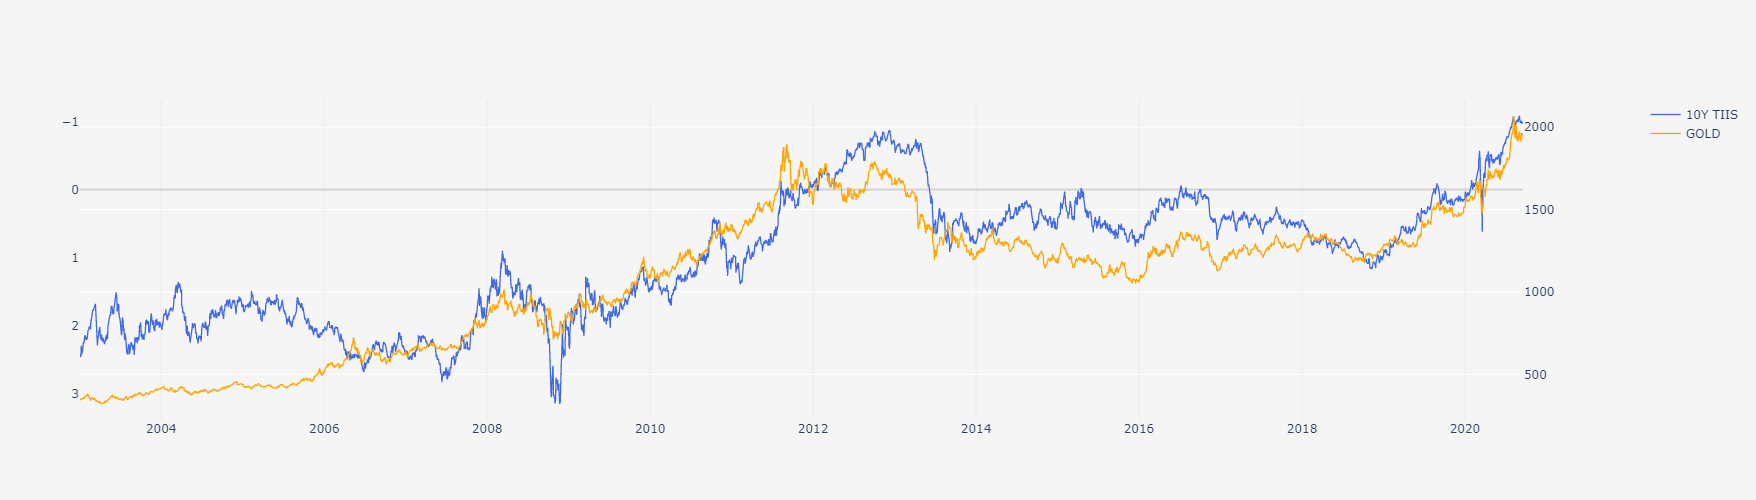

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['DFII10'], name="10Y TIIS", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['GOLD'], name="GOLD", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        autorange='reversed'

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [72]:
import statsmodels.api as sm
pa.compute_r2_table(data[['DFII10']], data['GOLD'])

,DFII10
GOLD,0.79


In [73]:
data

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2020-09-11,-0.98,"1,947.40"
2020-09-14,-0.97,"1,958.70"
2020-09-15,-0.99,"1,949.35"


In [74]:
X = data['DFII10']
Y = data['GOLD']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   GOLD   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:17:19   Log-Likelihood:                -30905.
No. Observations:                4621   AIC:                         6.181e+04
Df Residuals:                    4619   BIC:                         6.183e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1478.7578      4.193    352.689      0.0

In [80]:
data = data[['DFII10', 'GOLD']].dropna()
grangercausalitytests(data, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.9210 , p=0.0001  , df_denom=4617, df_num=1
ssr based chi2 test:   chi2=14.9307 , p=0.0001  , df=1
likelihood ratio test: chi2=14.9066 , p=0.0001  , df=1
parameter F test:         F=14.9210 , p=0.0001  , df_denom=4617, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.3869  , p=0.0002  , df_denom=4614, df_num=2
ssr based chi2 test:   chi2=16.7921 , p=0.0002  , df=2
likelihood ratio test: chi2=16.7616 , p=0.0002  , df=2
parameter F test:         F=8.3869  , p=0.0002  , df_denom=4614, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.0392  , p=0.0004  , df_denom=4611, df_num=3
ssr based chi2 test:   chi2=18.1451 , p=0.0004  , df=3
likelihood ratio test: chi2=18.1095 , p=0.0004  , df=3
parameter F test:         F=6.0392  , p=0.0004  , df_denom=4611, df_num=3


{1: ({'ssr_ftest': (14.920991458060602, 0.00011364456724733069, 4617.0, 1),
   'ssr_chi2test': (14.930686709170454, 0.00011153394626145694, 1),
   'lrtest': (14.906612437102012, 0.00011296632507564639, 1),
   'params_ftest': (14.920991463678547, 0.00011364456691002947, 4617.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.386939986053143, 0.00023131462483926056, 4614.0, 2),
   'ssr_chi2test': (16.792057128556337, 0.00022576214599030197, 2),
   'lrtest': (16.761607719119638, 0.00022922560617909135, 2),
   'params_ftest': (8.386939985989475, 0.00023131462485394478, 4614.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.039187067670291, 0.0004226431610995073, 4611.0, 3),
   'ssr_chi2test': (18.145065633377623, 0.000410563127530586, 3),
   'lrtest': (18.109510902177135, 0.0004175565267901535, 3),
   'params_ftest': (6.039187067705403, 0.00042264316107847315, 4611.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0.

In [76]:
data

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2020-09-11,-0.98,"1,947.40"
2020-09-14,-0.97,"1,958.70"
2020-09-15,-0.99,"1,949.35"


In [9]:
data.to_csv('10y_TIIS_vs_GOLD.csv')

In [10]:
returns = data.pct_change().dropna()#.resample('W').last()

import numpy as np
returns = returns[~returns.isin([np.nan, np.inf, -np.inf]).any(1)]

pa.print_title('Returns in percentage')
returns * 100

**Returns in percentage**

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.20
2003-01-06,1.23,2.10
2003-01-07,-1.63,-0.78
2003-01-08,-5.37,0.21
2003-01-09,5.24,0.76
...,...,...
2020-09-11,-2.97,-0.96
2020-09-14,-1.02,0.58
2020-09-15,2.06,-0.48


In [11]:
returns

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.00
2003-01-06,0.01,0.02
2003-01-07,-0.02,-0.01
2003-01-08,-0.05,0.00
2003-01-09,0.05,0.01
...,...,...
2020-09-11,-0.03,-0.01
2020-09-14,-0.01,0.01
2020-09-15,0.02,-0.00


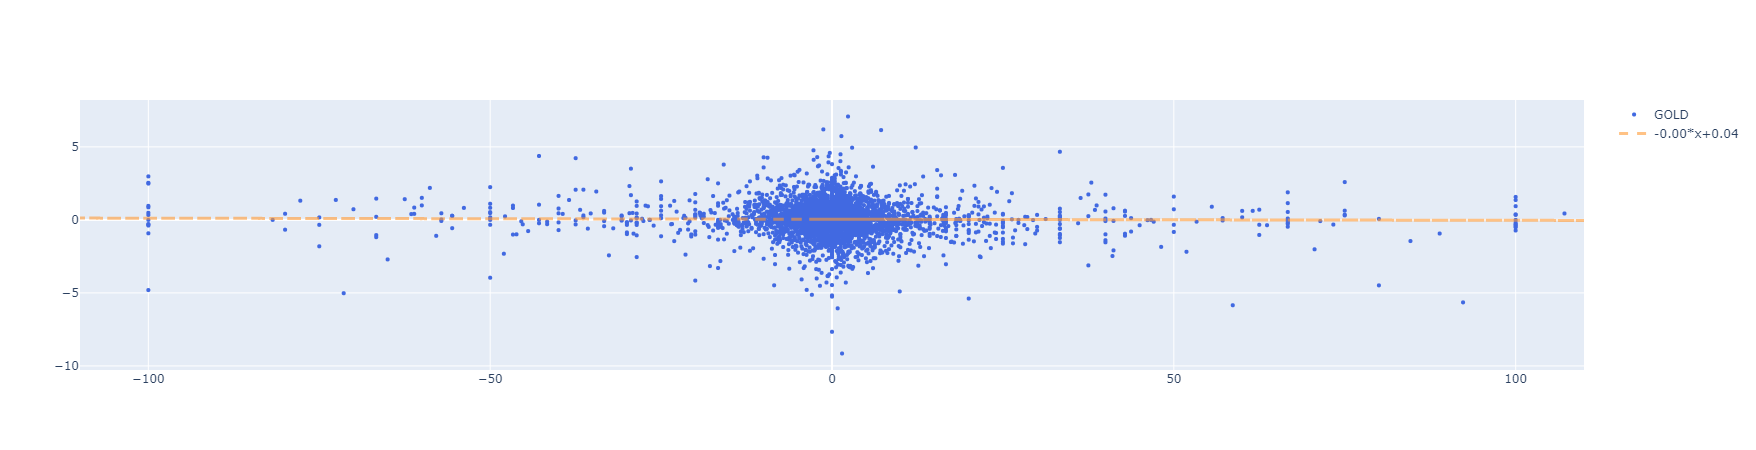

In [12]:
import plotly.graph_objs as go    
layout = go.Layout(
        xaxis=dict(
            range=[-110, 110]
        ),
        yaxis=dict(
#             range=[-5, 5]
        )
    )

returns_100 = returns * 100

returns_100.iplot(kind='scatter',x='DFII10',y='GOLD',mode='markers', dimensions=pa.dimensions,
                color='royalblue', bestfit=True, size=4,
                yTitle='Gold', xTitle='TIPS', layout=layout)

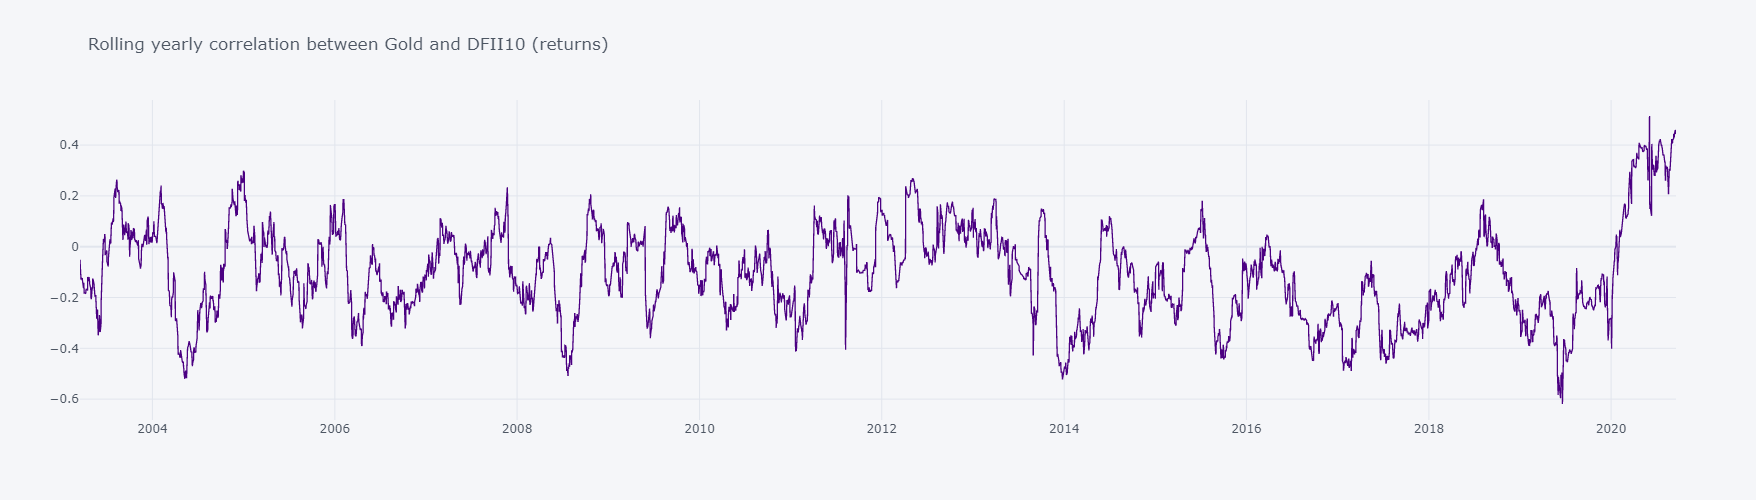

In [13]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().iplot(dimensions=pa.dimensions, color='indigo', title='Rolling yearly correlation between Gold and DFII10 (returns)')

In [14]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().to_csv('GOLD_DFII10_correlation.csv')

In [15]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

In [16]:
start = datetime.datetime(2000, 1, 1)
M2V = web.DataReader('M2V', 'fred', start)
WALCL = web.DataReader('WALCL', 'fred', start)

data = pa.merge_time_series(M2V, WALCL, how='outer').ffill()

In [17]:
data = data.resample('Q').last()

In [18]:
data.to_csv('MV2_vs_WALCL.csv')

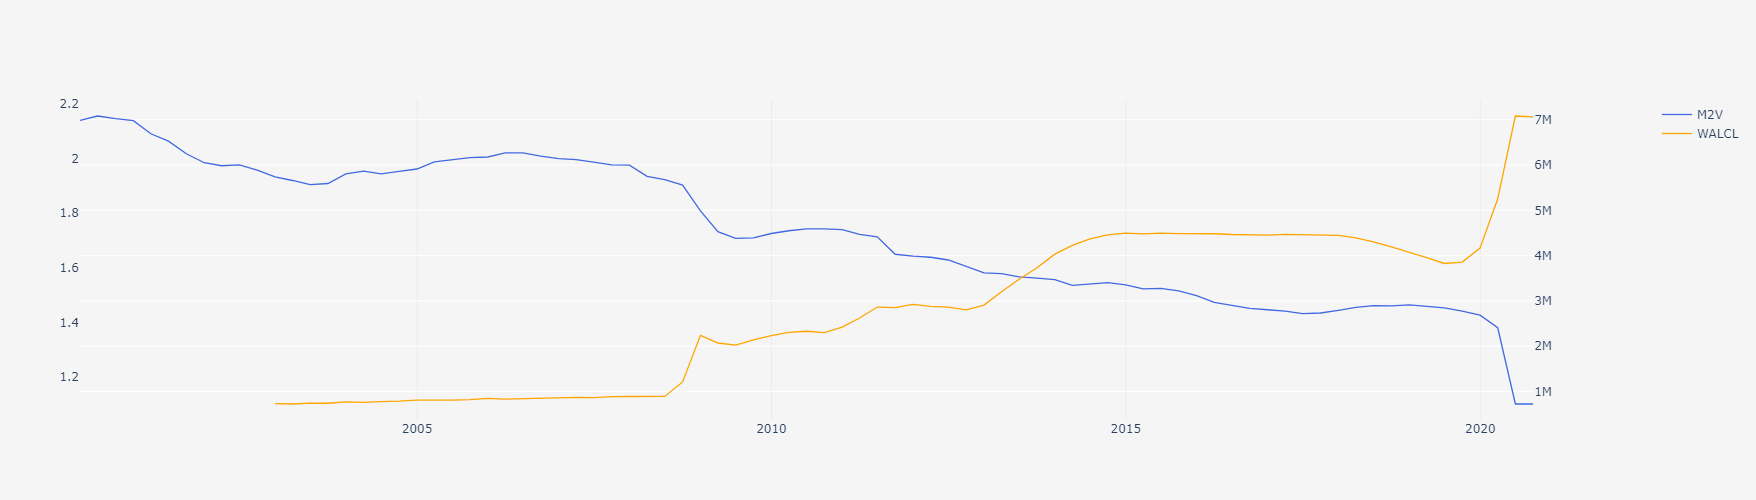

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['M2V'], name="M2V", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['WALCL'], name="WALCL", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

In [21]:
grangercausalitytests(returns, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6838  , p=0.1014  , df_denom=4601, df_num=1
ssr based chi2 test:   chi2=2.6855  , p=0.1013  , df=1
likelihood ratio test: chi2=2.6848  , p=0.1013  , df=1
parameter F test:         F=2.6838  , p=0.1014  , df_denom=4601, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6026  , p=0.2015  , df_denom=4598, df_num=2
ssr based chi2 test:   chi2=3.2086  , p=0.2010  , df=2
likelihood ratio test: chi2=3.2075  , p=0.2011  , df=2
parameter F test:         F=1.6026  , p=0.2015  , df_denom=4598, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9550  , p=0.4130  , df_denom=4595, df_num=3
ssr based chi2 test:   chi2=2.8694  , p=0.4122  , df=3
likelihood ratio test: chi2=2.8685  , p=0.4123  , df=3
parameter F test:         F=0.9550  , p=0.4130  , df_denom=4595, df_num=3


{1: ({'ssr_ftest': (2.6837885429744857, 0.10144267283729864, 4601.0, 1),
   'ssr_chi2test': (2.6855384594337166, 0.1012629907149696, 1),
   'lrtest': (2.684755519223472, 0.10131277386547928, 1),
   'params_ftest': (2.6837885429737915, 0.10144267283729864, 4601.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6025553390242024, 0.20149372191801168, 4598.0, 2),
   'ssr_chi2test': (3.208596009364247, 0.20103062794770185, 2),
   'lrtest': (3.2074782267627597, 0.20114301361960663, 2),
   'params_ftest': (1.6025553390240843, 0.20149372191801168, 4598.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9550048158259254, 0.41300259544158324, 4595.0, 3),
   'ssr_chi2test': (2.869378996146404, 0.4122058718223093, 3),
   'lrtest': (2.8684848289303773, 0.4123498206991433, 3),
   'params_ftest': (0.955004815826157, 0.41300259544150064, 4595.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [50]:
data = sm.datasets.macrodata.load_pandas()
data = data.data[['realgdp', 'realcons']].dropna()
grangercausalitytests(data, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.1879  , p=0.6646  , df=1
likelihood ratio test: chi2=0.1878  , p=0.6647  , df=1
parameter F test:         F=0.1851  , p=0.6675  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=47.0132 , p=0.0000  , df=2
likelihood ratio test: chi2=42.2456 , p=0.0000  , df=2
parameter F test:         F=22.9218 , p=0.0000  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=64.8202 , p=0.0000  , df=3
likelihood ratio test: chi2=56.1467 , p=0.0000  , df=3
parameter F test:         F=20.8505 , p=0.0000  , df_denom=193, df_num=3


{1: ({'ssr_ftest': (0.18513457660755267, 0.667462904685201, 199.0, 1),
   'ssr_chi2test': (0.18792555012424944, 0.6646488014181784, 1),
   'lrtest': (0.18783818843076006, 0.6647219979742095, 1),
   'params_ftest': (0.18513457660736798, 0.6674629046853691, 199.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (22.92184786631958, 1.134194262149921e-09, 196.0, 2),
   'ssr_chi2test': (47.01317776663505, 6.183269269580865e-11, 2),
   'lrtest': (42.24557154285321, 6.706419208312884e-10, 2),
   'params_ftest': (22.921847866320196, 1.1341942621493576e-09, 196.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (20.85048188879322, 9.596591336273015e-12, 193.0, 3),
   'ssr_chi2test': (64.8201509496162, 5.4806183266284045e-14, 3),
   'lrtest': (56.146710674355745, 3.9087429758080245e-12, 3),
   'params_ftest': (20.85048188879257, 9.596591336279994e-12, 193.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [51]:
data['DFII10']

KeyError: 'DFII10'